# Ejercicios práctica unidad 6

### Parte 1: Preguntas de Selección Múltiple

**1. ¿Cuál de las siguientes afirmaciones describe mejor la diferencia fundamental entre Aprendizaje Supervisado y No Supervisado?**

A) En el aprendizaje no supervisado, el modelo se entrena con datos que tienen etiquetas de salida claras ("target"), mientras que en el supervisado no.

B) El aprendizaje no supervisado se utiliza cuando queremos predecir un valor numérico futuro basándonos en datos históricos etiquetados.

C) El aprendizaje no supervisado trabaja con datos de entrada sin etiquetas, buscando estructuras ocultas, patrones o agrupaciones inherentes en los datos.

D) Los algoritmos de clasificación como Regresión Logística son ejemplos clásicos de aprendizaje no supervisado.

**Tu Respuesta:** [   ]

---

**2. Respecto a las limitaciones de los algoritmos de Clustering, selecciona la afirmación INCORRECTA:**

A) K-Means es sensible a los valores atípicos (outliers), ya que estos pueden desplazar el centroide lejos del grupo real.

B) DBSCAN requiere que especifiquemos el número exacto de clústeres (k) antes de ejecutar el algoritmo, al igual que K-Means.

C) El Clustering Jerárquico Aglomerativo puede ser computacionalmente costoso en conjuntos de datos muy grandes.

D) K-Means asume que los clústeres son convexos (esféricos), por lo que falla al agrupar formas geométricas complejas como anillos o lunas entrelazadas.

**Tu Respuesta:** [   ]

---

### Parte 2: Preguntas Abiertas

**3. K-Means es un algoritmo iterativo que depende de la inicialización aleatoria. ¿Qué problema puede causar esto y qué técnica se usa comúnmente en `sklearn` para mitigarlo?**

**Tu Respuesta:**
*Escribe aquí tu explicación...*

<br>

**4. Explica brevemente cómo funciona el "Análisis de Dendrograma" en el clustering jerárquico y cómo ayuda a determinar el número de grupos.**

**Tu Respuesta:**
*Escribe aquí tu explicación...*

---



# SOLUCIONARIO

### Respuestas Teóricas

**1. Respuesta:** C
*Explicación:* El aprendizaje no supervisado no utiliza etiquetas (targets), a diferencia del supervisado. La opción A es lo opuesto, la B describe regresión (supervisada) y la D menciona un algoritmo supervisado.

**2. Respuesta:** B
*Explicación:* Esta es la afirmación incorrecta. La principal ventaja de DBSCAN es que NO requiere especificar el número de clústeres de antemano; los encuentra basándose en la densidad.

**3. Respuesta:**
El problema es que K-Means puede converger en un **óptimo local** en lugar del óptimo global si los centroides iniciales están mal ubicados. Para mitigarlo, `sklearn` utiliza por defecto la inicialización **`k-means++`** (que separa los centroides iniciales entre sí) y ejecuta el algoritmo varias veces (`n_init`) quedándose con el mejor resultado (menor inercia).

**4. Respuesta:**
El dendrograma es un árbol que muestra el orden y las distancias a las que se fusionan los clústeres. Para determinar el número de grupos, se busca la **línea vertical más larga** que no es cruzada por ninguna línea horizontal (lo que indica un gran salto en la distancia de fusión) y se hace un corte horizontal allí. El número de líneas verticales que cruza el corte es el número óptimo de clústeres ($k$).

### Parte 3: Ejercicio de Programación

**Instrucciones:**
1. Ejecuta la celda de configuración para generar el dataset "Two Moons".
2. Completa el código para aplicar **K-Means** y **DBSCAN**.
3. El objetivo es demostrar qué algoritmo funciona mejor para datos con formas no lineales.

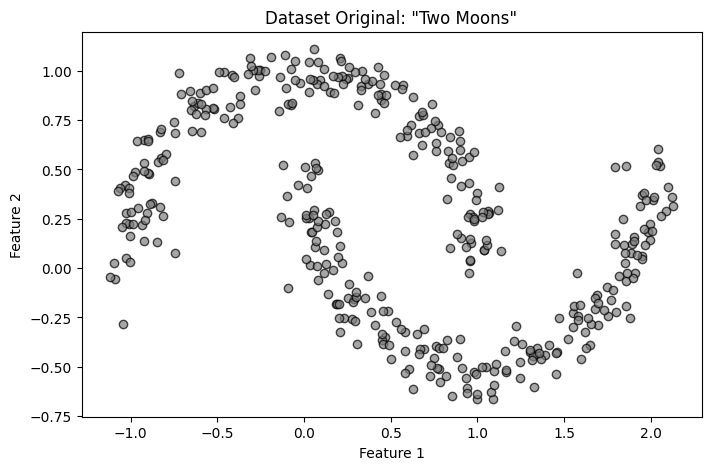

In [2]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# --- NO MODIFICAR ESTA CELDA ---
# Generamos datos con forma de dos lunas (no lineal)
# Aumentamos el ruido ligeramente para hacerlo más realista
X, label = make_moons(n_samples=400, noise=0.08, random_state=42)

# Visualización de los datos crudos
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7, edgecolor='k')
plt.title('Dataset Original: "Two Moons"')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Tarea:**
1. Utiliza `KMeans` para agrupar estos datos en 2 clústeres.
2. Utiliza `DBSCAN` para agrupar los datos. Deberás ajustar los parámetros `eps` y `min_samples` para que detecte las dos lunas correctamente.
3. Visualiza ambos resultados uno al lado del otro.

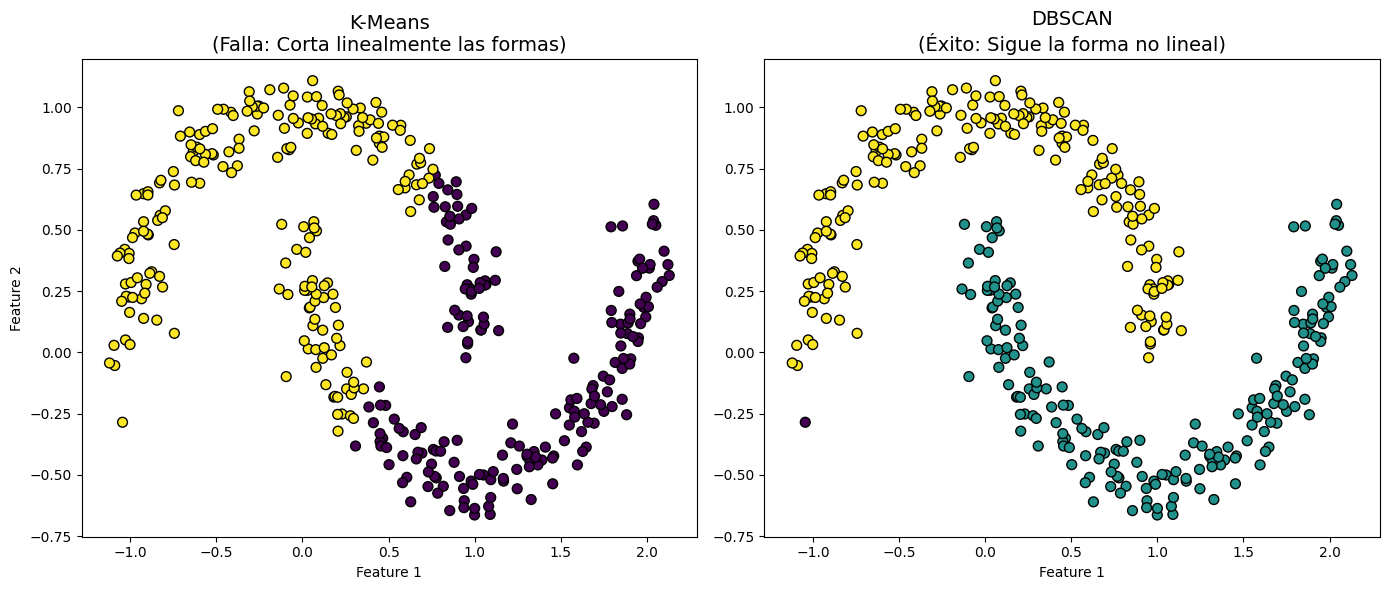

In [4]:
from sklearn.cluster import KMeans, DBSCAN

# Solución completa del ejercicio de programación

# 1. Modelo KMeans
# K-Means busca formas esféricas, por lo que partirá las lunas a la mitad.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 2. Modelo DBSCAN
# DBSCAN agrupa por densidad.
# Con noise=0.08, un eps de 0.2 suele conectar bien los puntos de una misma luna.
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# 3. Visualización Comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot K-Means
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, edgecolor='k')
ax1.set_title('K-Means\n(Falla: Corta linealmente las formas)', fontsize=14)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot DBSCAN
# Nota: Los puntos morados oscuros (si los hay) suelen ser ruido (-1) en DBSCAN
ax2.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=50, edgecolor='k')
ax2.set_title('DBSCAN\n(Éxito: Sigue la forma no lineal)', fontsize=14)
ax2.set_xlabel('Feature 1')

plt.tight_layout()
plt.show()